In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("C:/Users/JUAN PABLO/OneDrive/Documentos/7-SEMESTRE/Vehicle dataset/Car details v3.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(8128, 13)

In [3]:
data.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.
Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [5]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Hacemos una visualización en general de los datos de entrada y Análisis Exploratorio de Datos (EDA):

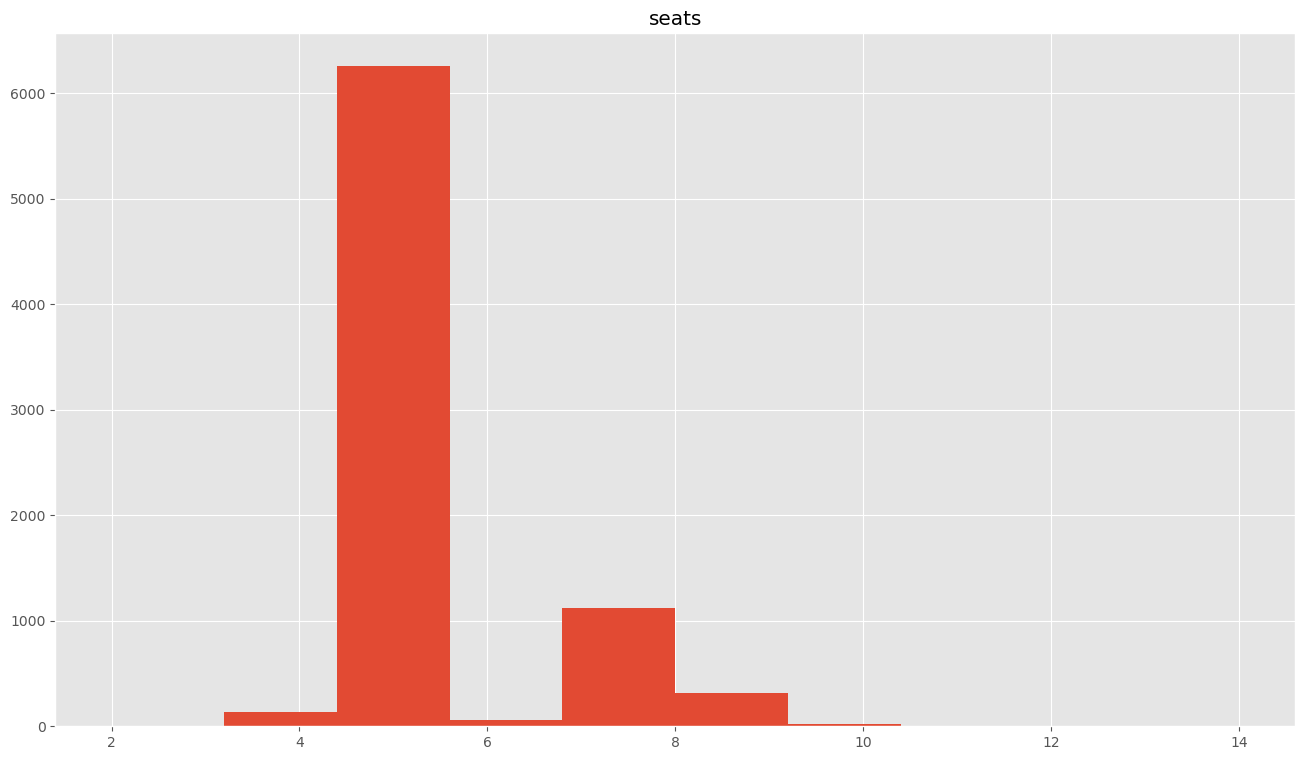

In [11]:
data.drop(['year','selling_price', 'km_driven', 'fuel', 'transmission', 'owner'], axis=1).hist()
plt.show()

Correlación entre variables numéricas:

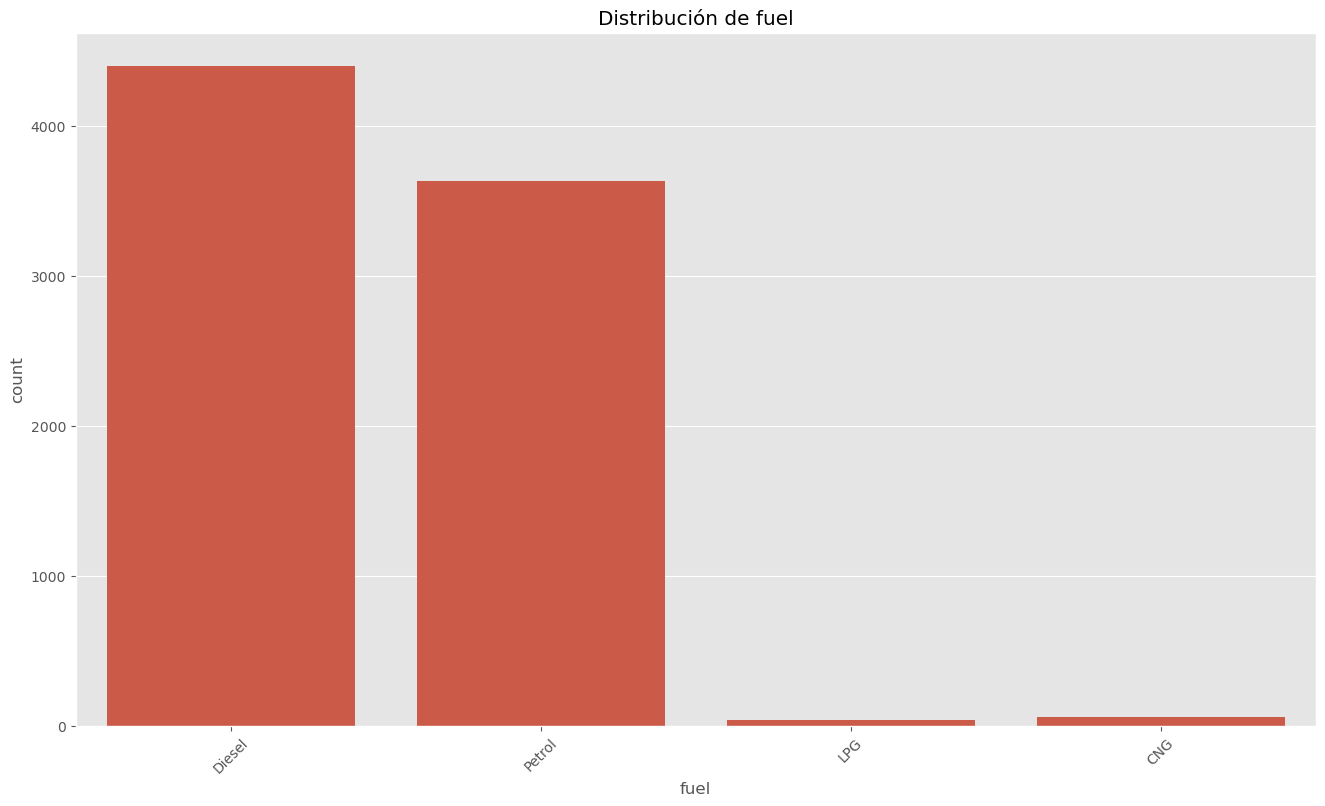

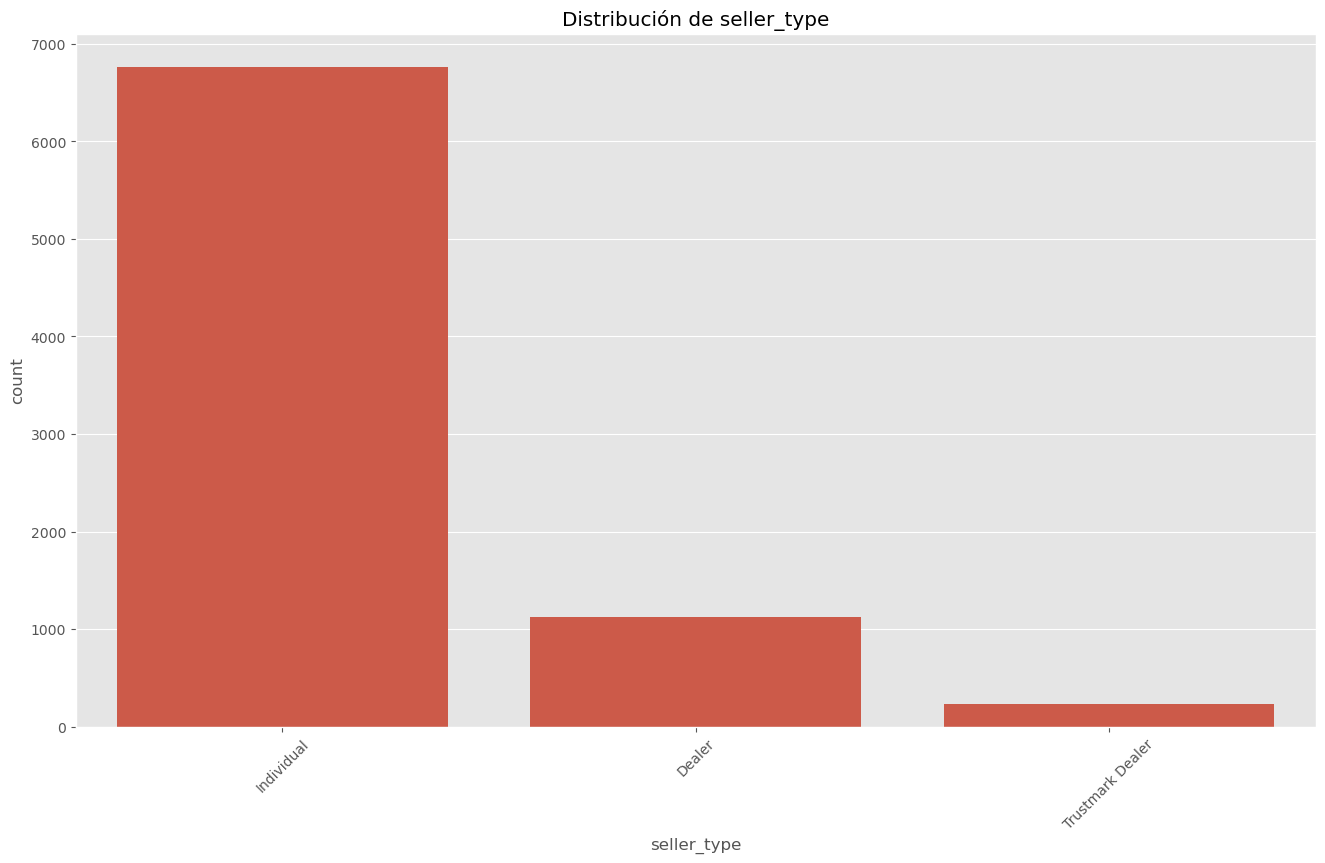

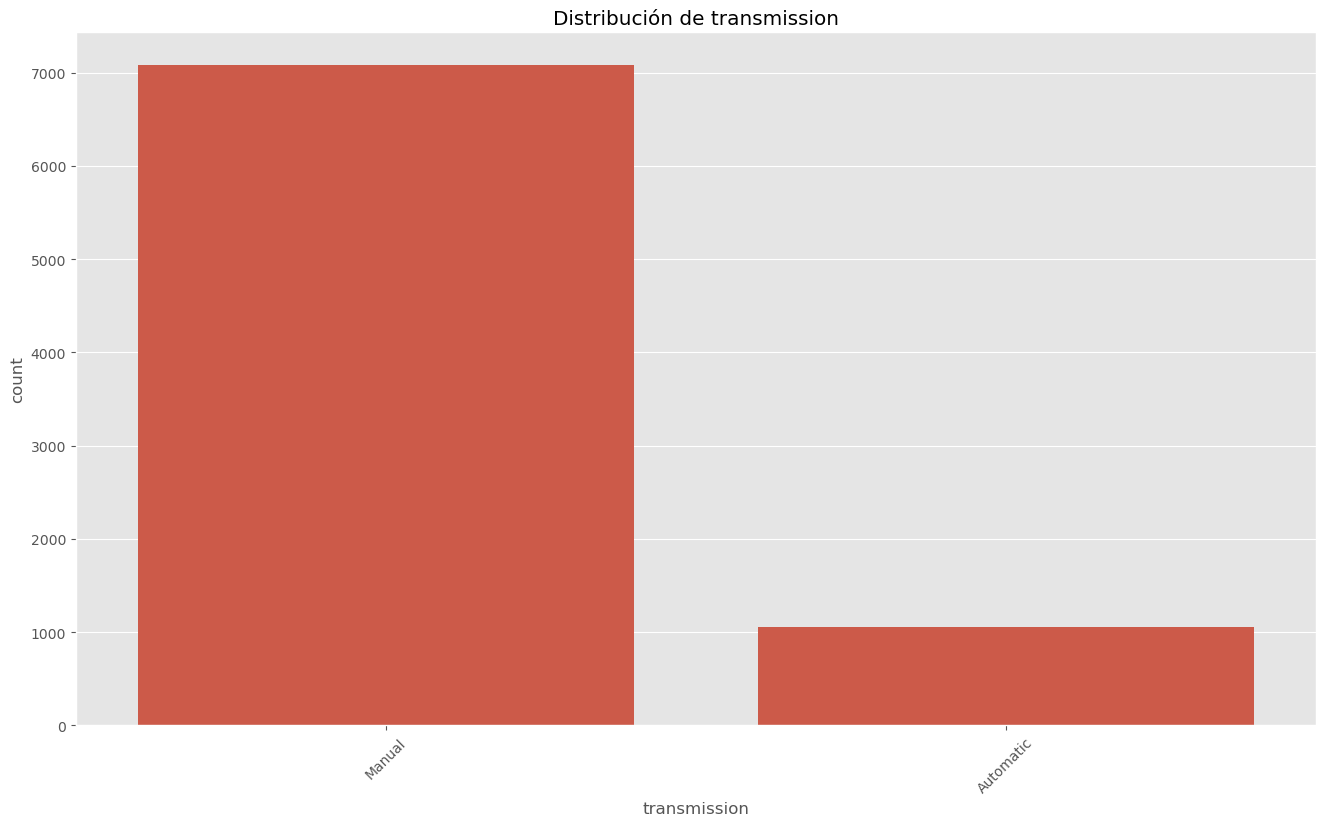

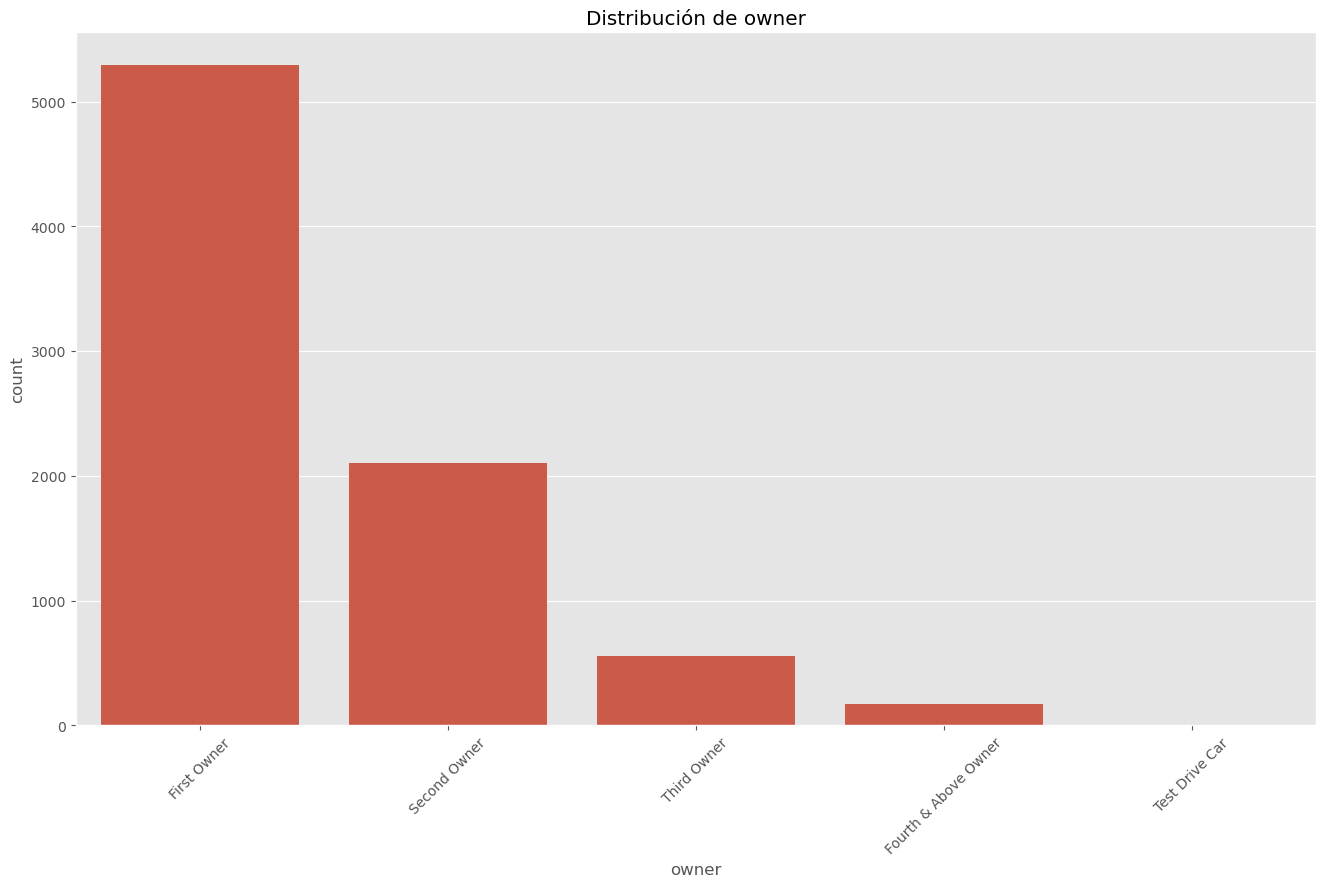

In [13]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    sb.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')
    plt.show()

Boxplots para identificar outliers:

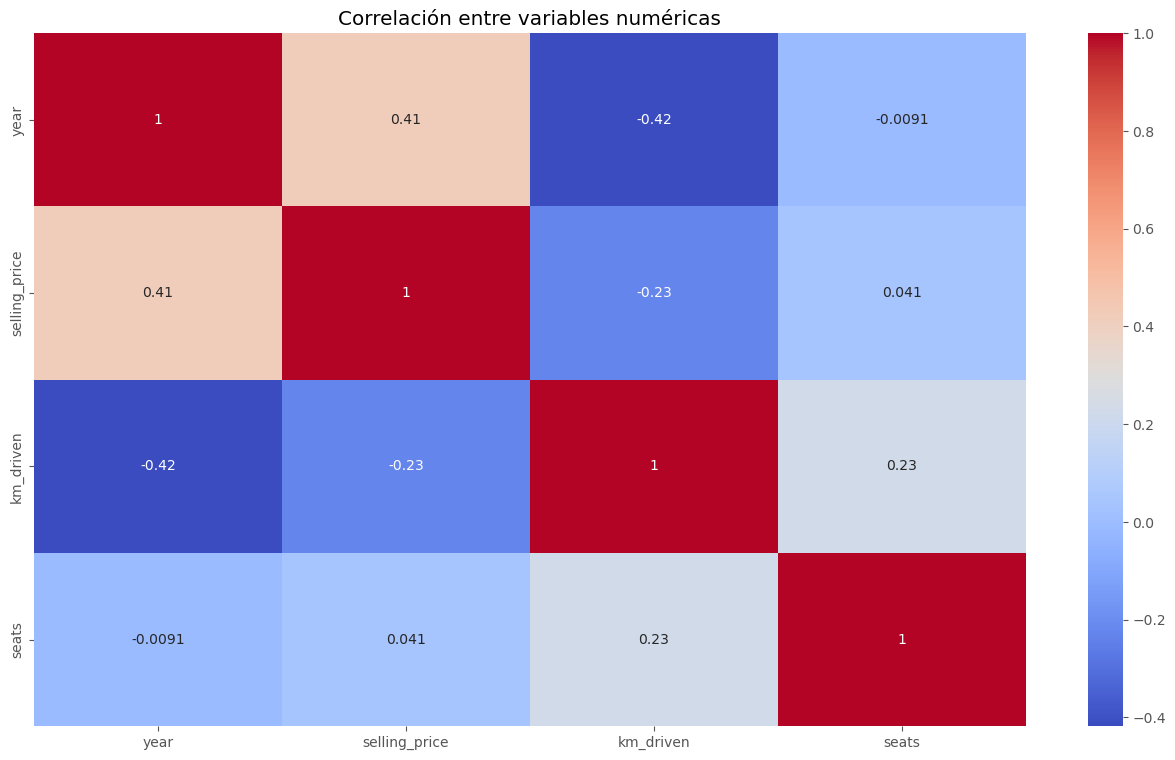

In [15]:
numerical_cols = ['year', 'selling_price', 'km_driven', 'seats']
sb.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

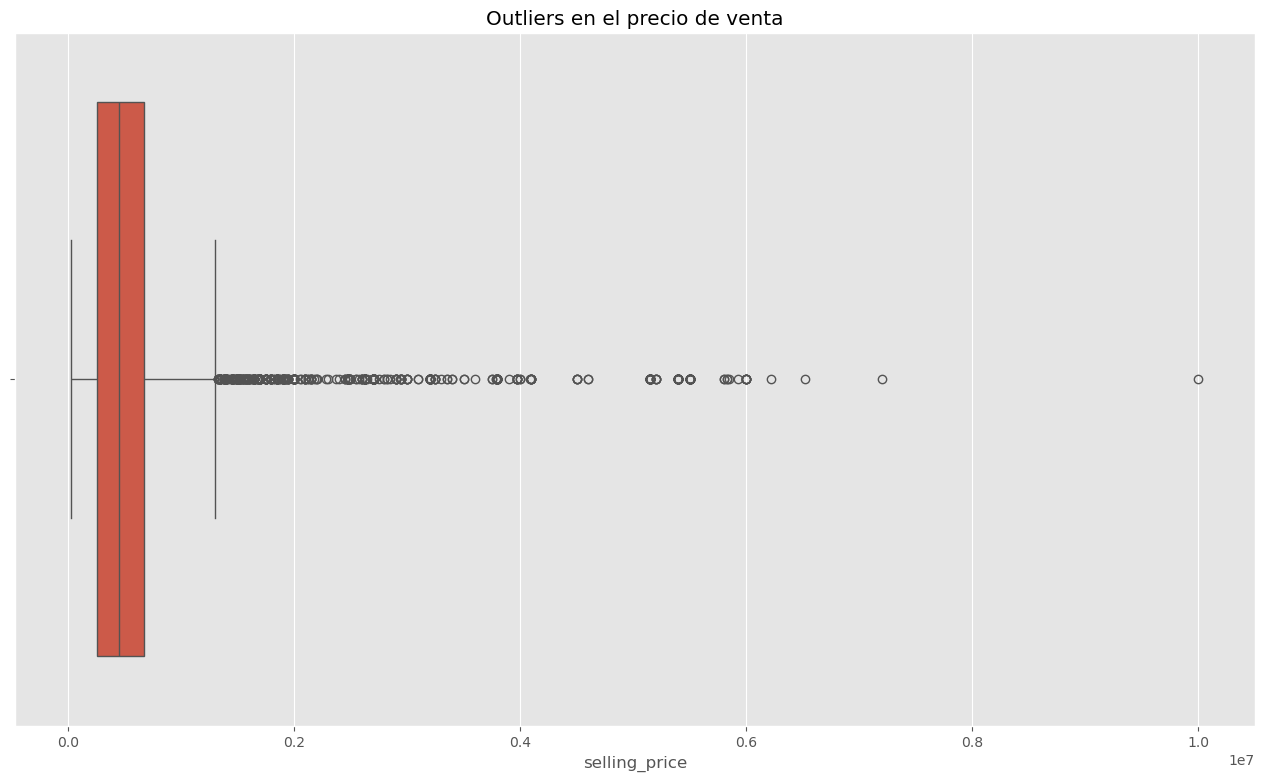

In [17]:
sb.boxplot(x=data['selling_price'])
plt.title('Outliers en el precio de venta')
plt.show()

Preprocesamiento de Datos

In [19]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [23]:
# Reemplazamos los valores vacíos o que no se pueden convertir con NaN
data['max_power'] = data['max_power'].str.replace(' bhp', '')
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')  # esto convierte los '' o no convertibles en NaN

# Ahora rellenamos los NaN con la mediana
data['max_power'] = data['max_power'].fillna(data['max_power'].median())

In [31]:
# mileage: asegurar que es string antes de usar .str
data['mileage'] = data['mileage'].astype(str)
data['mileage'] = data['mileage'].str.replace(' kmpl', '', regex=False).str.replace(' km/kg', '', regex=False)
data['mileage'] = pd.to_numeric(data['mileage'], errors='coerce')
data['mileage'] = data['mileage'].fillna(data['mileage'].median())

# engine
data['engine'] = data['engine'].astype(str)
data['engine'] = data['engine'].str.replace(' CC', '', regex=False)
data['engine'] = pd.to_numeric(data['engine'], errors='coerce')
data['engine'] = data['engine'].fillna(data['engine'].median())

# max_power (si aún no lo hiciste así)
data['max_power'] = data['max_power'].astype(str)
data['max_power'] = data['max_power'].str.replace(' bhp', '', regex=False)
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data['max_power'] = data['max_power'].fillna(data['max_power'].median())

# seats
data['seats'] = data['seats'].fillna(data['seats'].median())

Selección de Características. Primero convertí las variables categóricas a numéricas (One Hot Encoding):

In [40]:
print(data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [42]:
# Eliminamos columnas no numéricas o innecesarias
data_model = data.drop(['name', 'torque'], axis=1)

División en Train y Test

In [44]:
# Variables independientes (X) y variable objetivo (y)
X = data_model.drop('selling_price', axis=1)
y = data_model['selling_price']

In [46]:
from sklearn.model_selection import train_test_split

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = modelo.predict(X_test)

Evaluación del Modelo

In [65]:
#Podemos evaluar con métricas de regresión:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
print("MAE (Error Absoluto Medio):", mean_absolute_error(y_test, y_pred))
print("RMSE (Raíz del Error Cuadrático Medio):", root_mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE (Error Absoluto Medio): 280821.32296604285
RMSE (Raíz del Error Cuadrático Medio): 479830.22726239427
R2 Score: 0.6920149378492202


 Gráfico de Predicción vs Realidad:

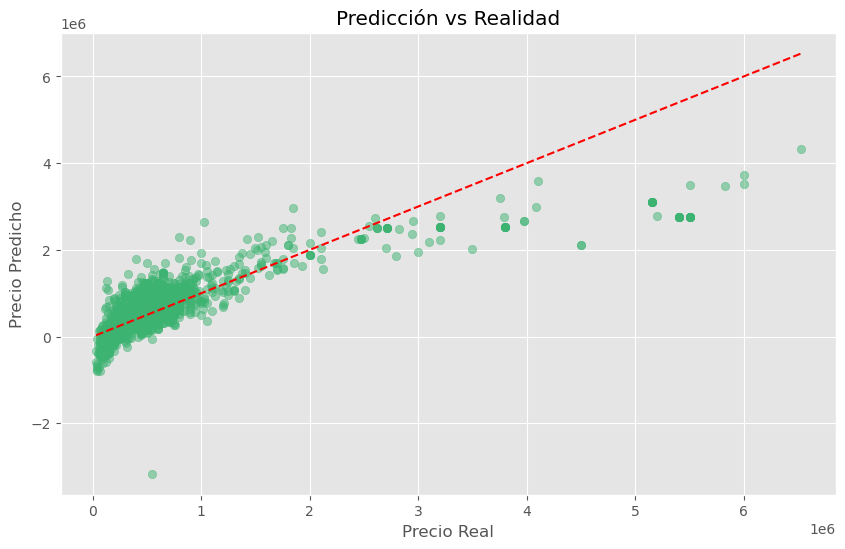

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Realidad')
plt.grid(True)
plt.show()

Distribución de los Errores

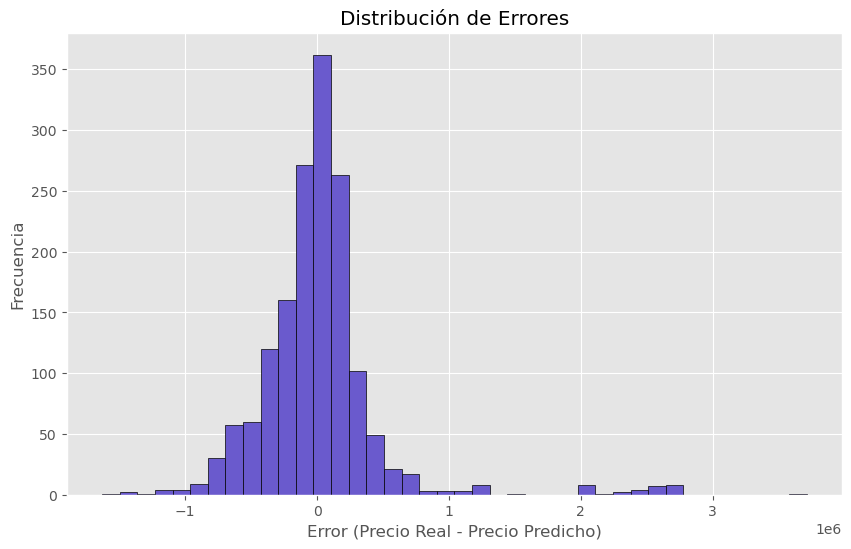

In [72]:
errors = y_test - y_pred

plt.figure(figsize=(10,6))
plt.hist(errors, bins=40, color='slateblue', edgecolor='black')
plt.title("Distribución de Errores")
plt.xlabel("Error (Precio Real - Precio Predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

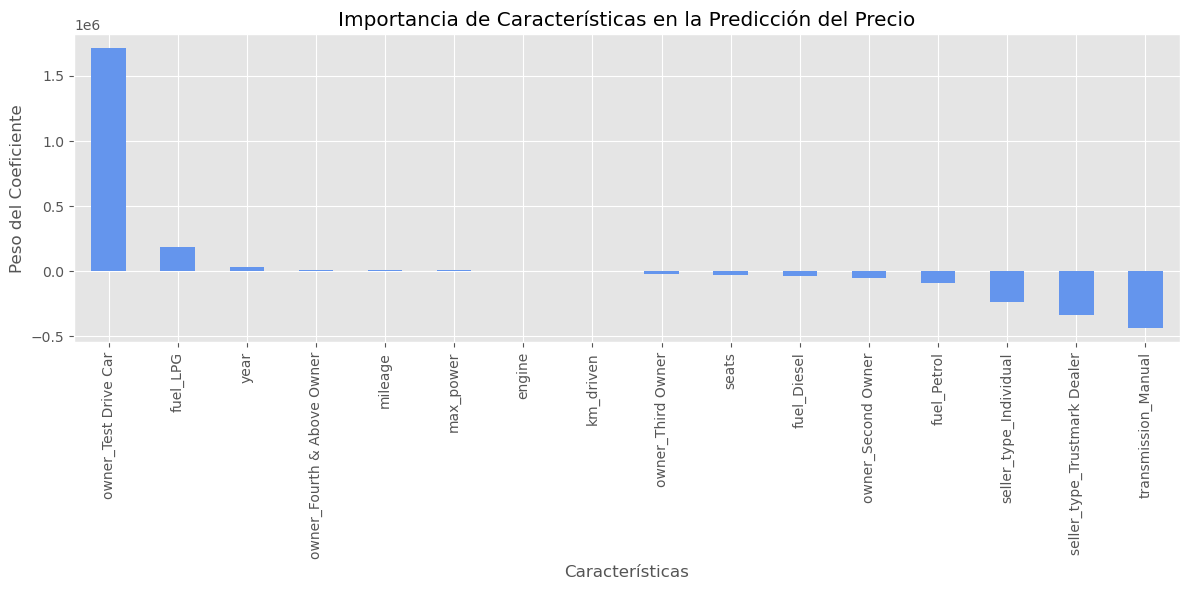

In [78]:
feature_importance = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='cornflowerblue')
plt.title("Importancia de Características en la Predicción del Precio")
plt.xlabel("Características")
plt.ylabel("Peso del Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

Resultados y analisis:

MAE (Error Absoluto Medio): 280,821 → En promedio, el modelo se equivoca por unos ~280 mil rupias.

RMSE (Raíz del Error Cuadrático Medio): 479,830 → Penaliza más los errores grandes. Está un poco elevado, pero aceptable para un primer modelo base.

R² Score: 0.692 → El modelo explica alrededor del 69% de la varianza del precio de los autos.

Se entrenó un modelo de regresión lineal para predecir el precio de un automóvil en base a sus características técnicas y de mercado. Se obtuvo un R² de 0.69 y un MAE cercano a 280 mil. Se identificaron como variables más influyentes la potencia máxima, el motor y el kilometraje recorrido. 